In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv("train.csv")
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace =True)

In [7]:
df.duplicated().sum()

0

In [8]:
df['fake'].value_counts()

fake
0    287
1    287
Name: count, dtype: int64

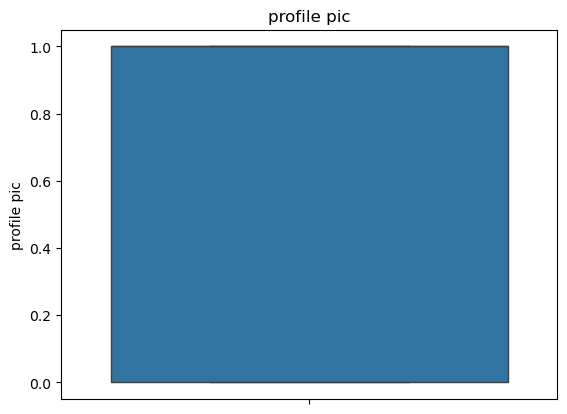

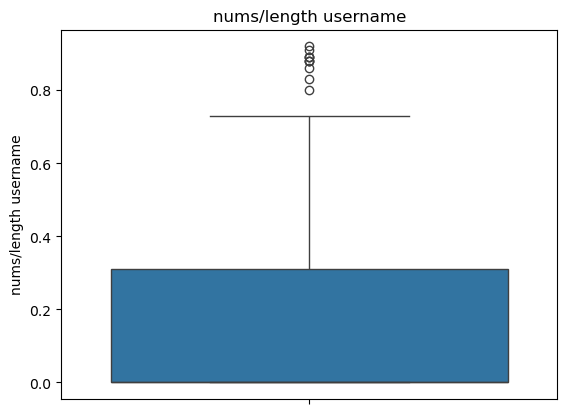

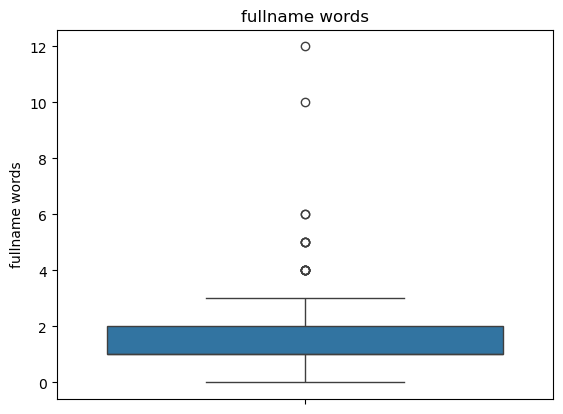

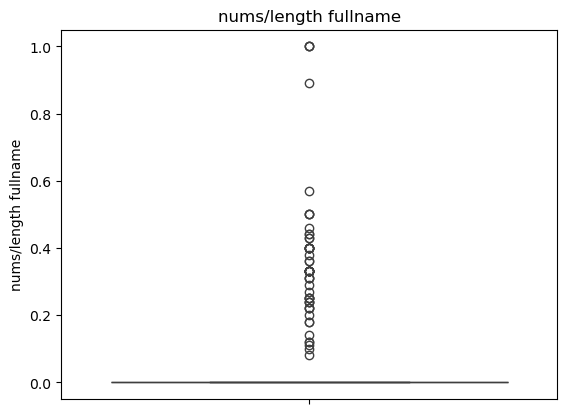

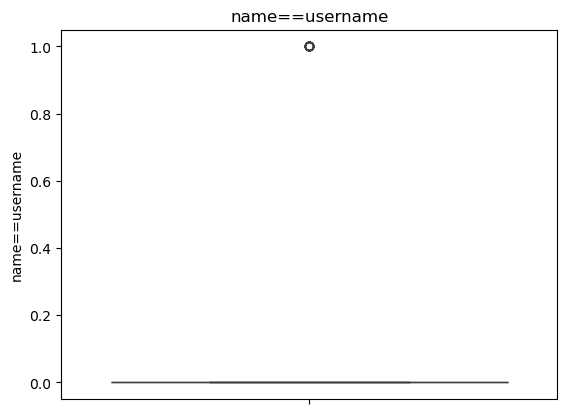

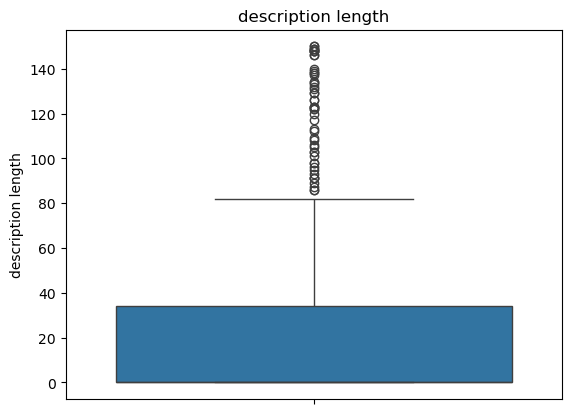

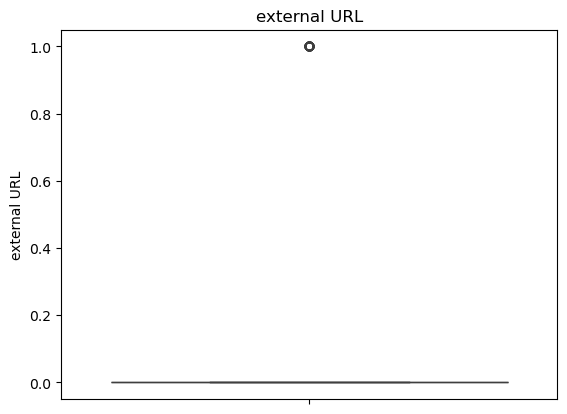

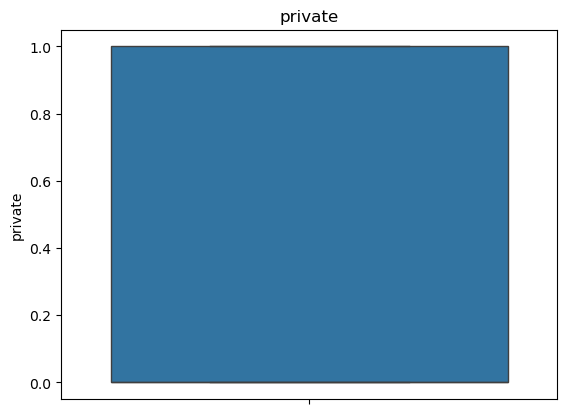

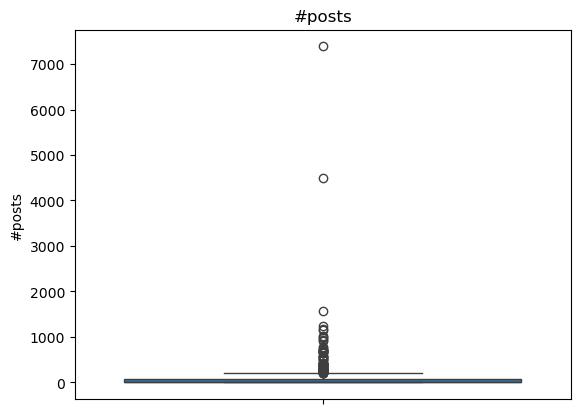

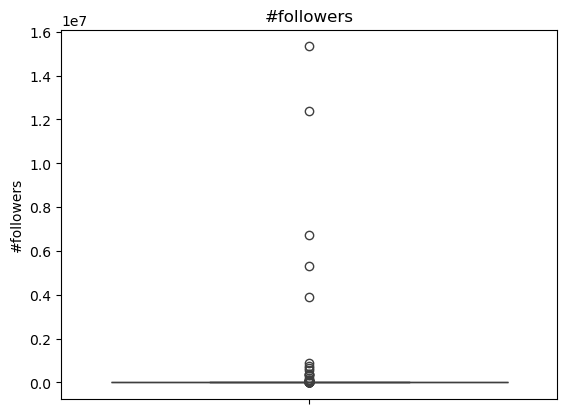

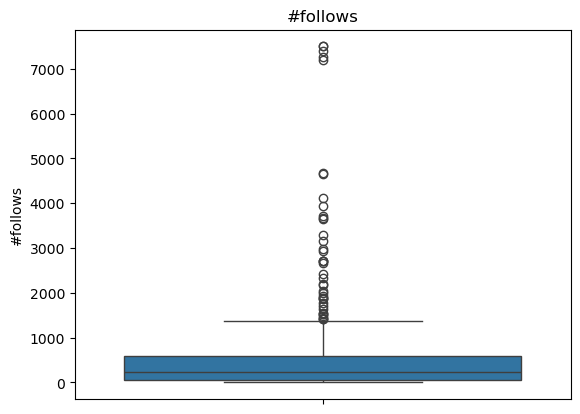

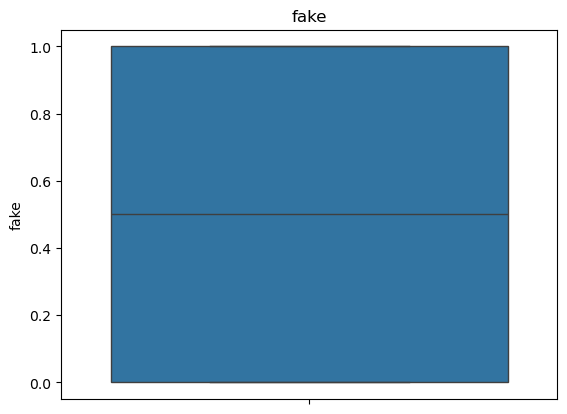

In [9]:
for col in df:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [10]:
df['private'].value_counts()

private
0    354
1    220
Name: count, dtype: int64

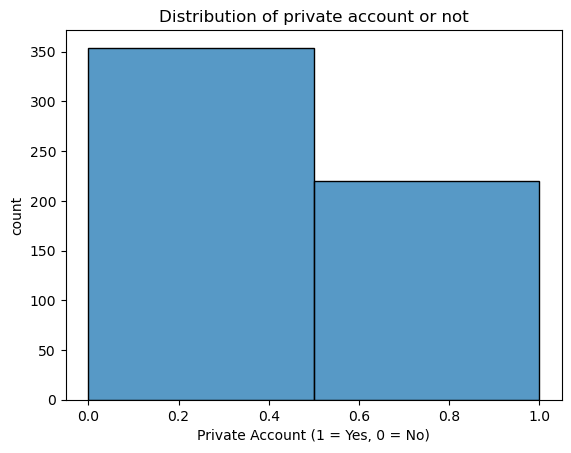

In [11]:
sns.histplot(data=df,x='private',bins=2)
plt.title('Distribution of private account or not')
plt.xlabel("Private Account (1 = Yes, 0 = No)")
plt.ylabel("count")
plt.show()

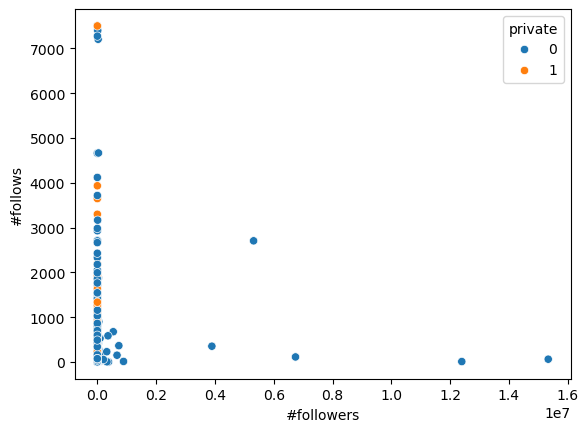

In [12]:
sns.scatterplot(data=df,x='#followers',y='#follows',hue='private')
plt.show()

In [13]:
df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [14]:
df['name==username'].value_counts()

name==username
0    554
1     20
Name: count, dtype: int64

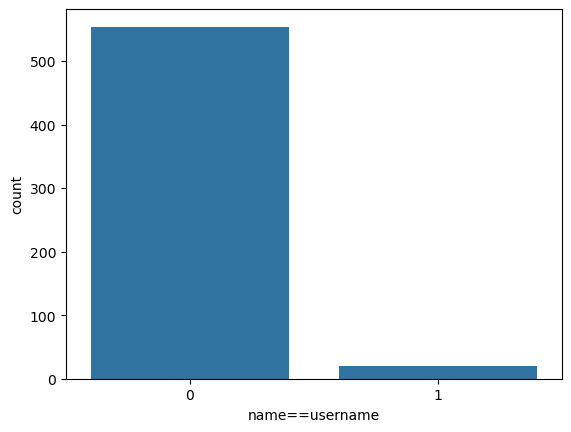

In [15]:
sns.countplot(data=df,x='name==username')
plt.show()

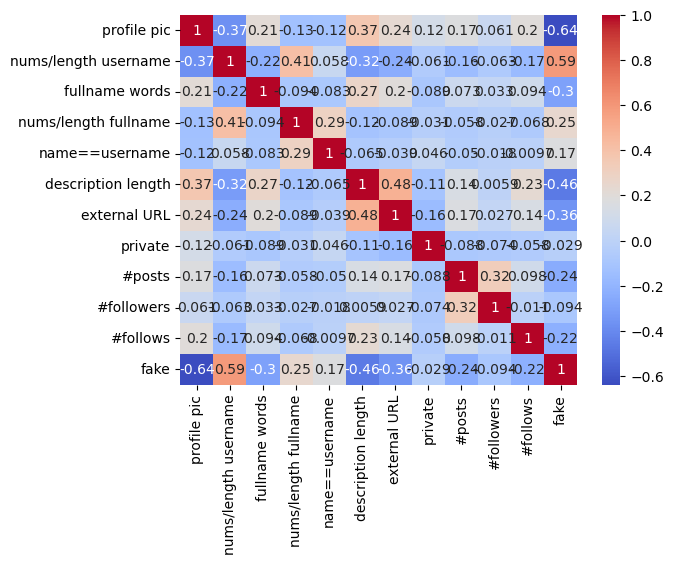

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

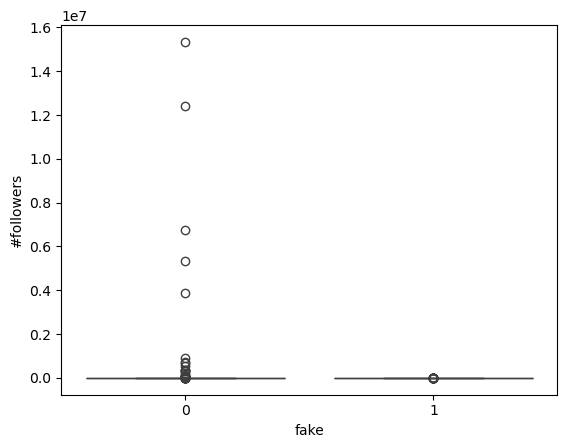

In [17]:
sns.boxplot(data=df,x='fake', y='#followers')
plt.show()

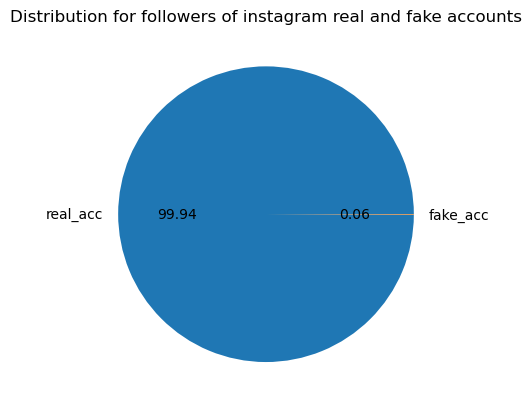

In [18]:
df1=df.groupby('fake')['#followers'].mean()
df1.plot(kind='pie',labels=['real_acc','fake_acc'],autopct='%.2f')
plt.title("Distribution for followers of instagram real and fake accounts")
plt.ylabel("")
plt.show()

In [19]:
df1

fake
0    171079.571429
1       110.710801
Name: #followers, dtype: float64

In [20]:
df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [21]:
df['name==username'].value_counts()

name==username
0    554
1     20
Name: count, dtype: int64

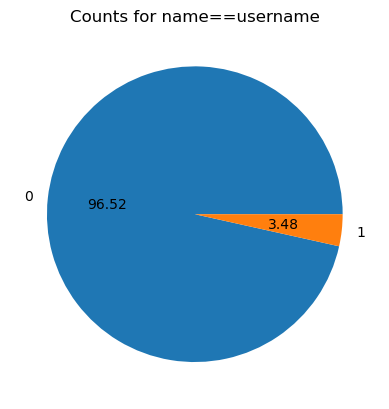

In [22]:
plt.pie(df['name==username'].value_counts(),labels=df['name==username'].value_counts().keys(),autopct="%.2f")
plt.title("Counts for name==username")
plt.show()

In [23]:
(554/(554+20))*100

96.51567944250871

In [24]:
df.groupby('fake')['#posts'].mean()

fake
0    205.989547
1      8.965157
Name: #posts, dtype: float64

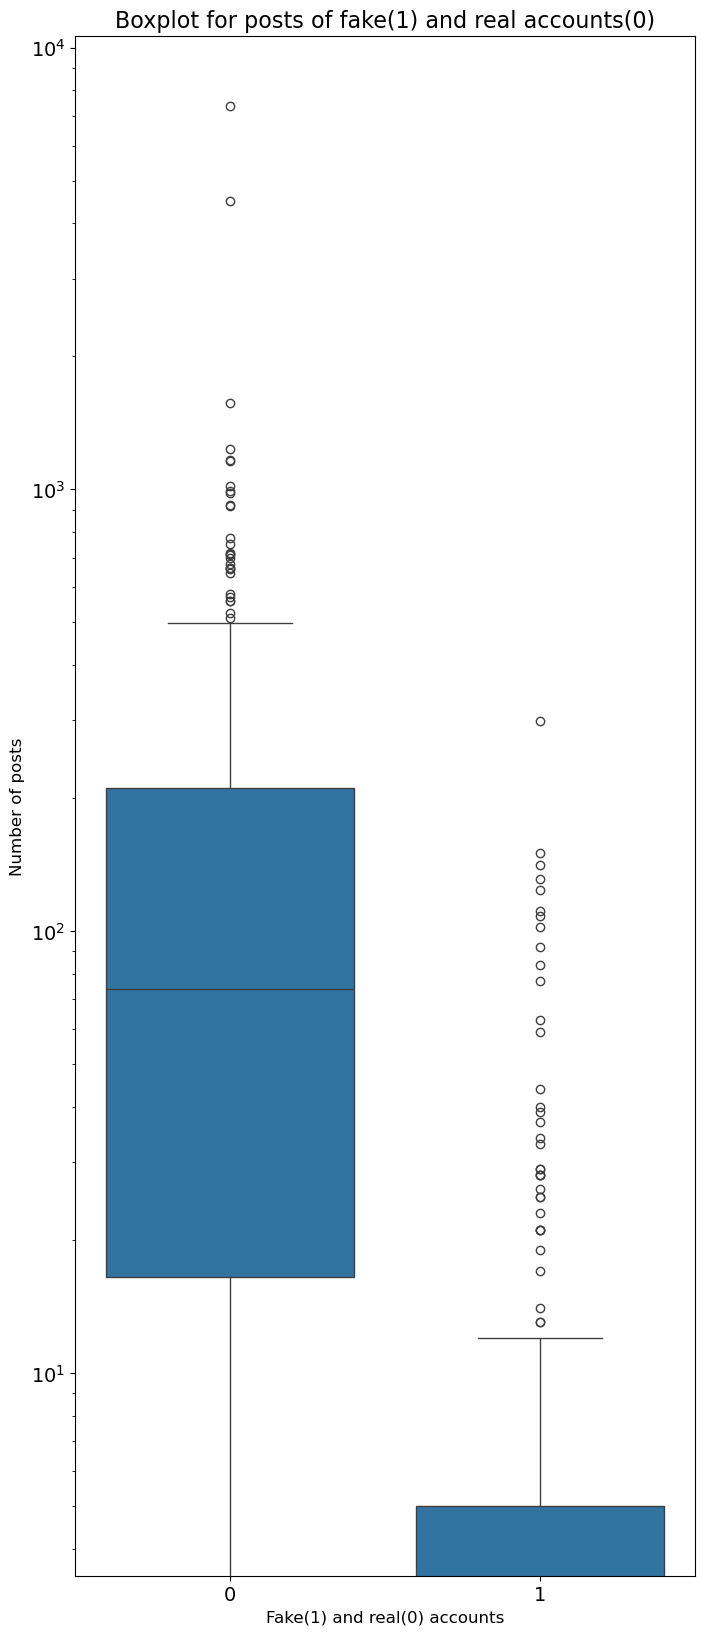

In [25]:
plt.figure(figsize=(8,20))
sns.boxplot(data=df,x='fake',y='#posts')
plt.title("Boxplot for posts of fake(1) and real accounts(0)",fontsize=16)
plt.xlabel("Fake(1) and real(0) accounts",fontsize=12)
plt.ylabel("Number of posts",fontsize=12)
plt.yscale("log")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [26]:
df.groupby('fake')['#follows'].mean()

fake
0    714.815331
1    303.128920
Name: #follows, dtype: float64

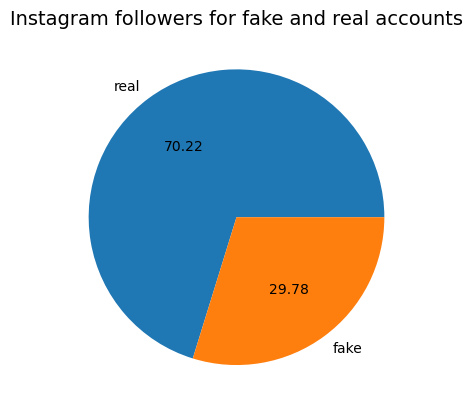

In [27]:
plt.pie(df.groupby('fake')['#follows'].mean(),labels=['real','fake'],autopct="%.2f")
plt.title("Instagram followers for fake and real accounts",fontsize=14)
plt.show()

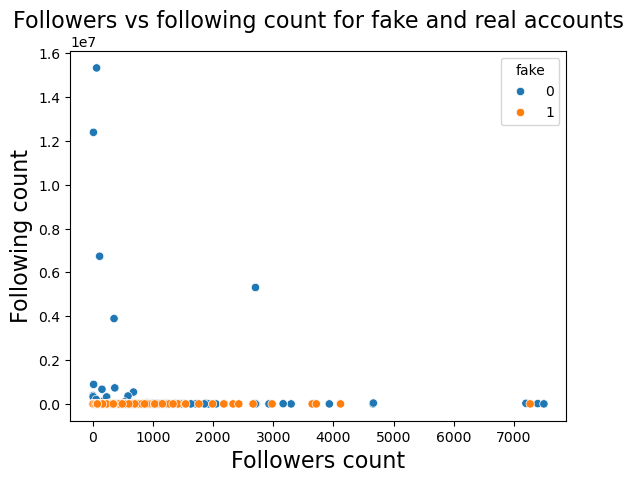

In [28]:
sns.scatterplot(data=df,x="#follows",y="#followers",hue="fake")
plt.title("Followers vs following count for fake and real accounts",fontsize=16)
plt.xlabel("Followers count",fontsize=16)
plt.ylabel("Following count",fontsize=16)
plt.show()

In [29]:
df['profile pic'].value_counts()

profile pic
1    402
0    172
Name: count, dtype: int64

In [30]:
df.groupby('profile pic')['fake'].value_counts()

profile pic  fake
0            1       170
             0         2
1            0       285
             1       117
Name: count, dtype: int64

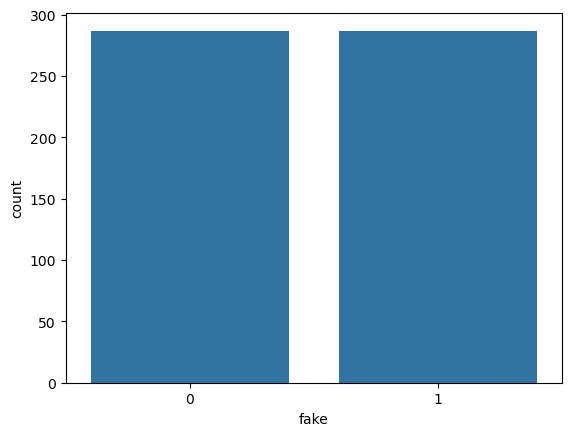

In [31]:
sns.countplot(data=df,x='fake')
plt.show()

In [32]:
df['fake'].value_counts()

fake
0    287
1    287
Name: count, dtype: int64

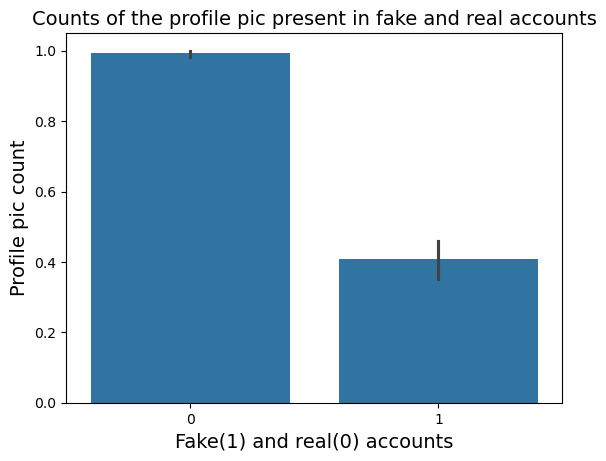

In [33]:
sns.barplot(data=df,x='fake',y='profile pic')
plt.title("Counts of the profile pic present in fake and real accounts",fontsize=14)
plt.xlabel("Fake(1) and real(0) accounts",fontsize=14)
plt.ylabel("Profile pic count",fontsize=14)
plt.show()


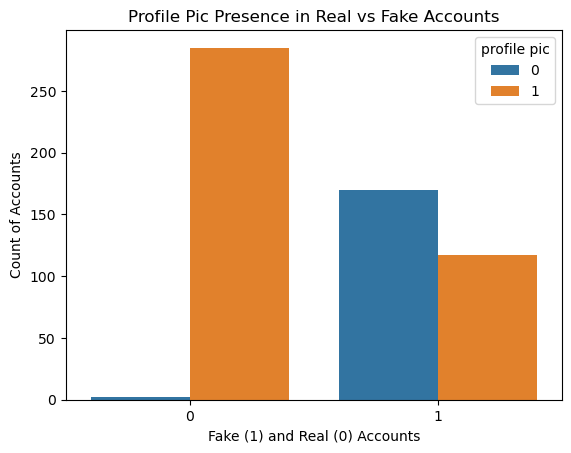

In [34]:
sns.countplot(data=df, x='fake', hue='profile pic')
plt.title('Profile Pic Presence in Real vs Fake Accounts')
plt.xlabel('Fake (1) and Real (0) Accounts')
plt.ylabel('Count of Accounts')
plt.show()


In [35]:
df.groupby('fake')['profile pic'].value_counts()

fake  profile pic
0     1              285
      0                2
1     0              170
      1              117
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [37]:
scaled_features=scalar.fit_transform(df.drop('fake',axis=1))

In [38]:
scaled_data=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [39]:
scaled_data['fake']=df['fake']

In [40]:
scaled_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,0.654111,0.505808,-1.386316,-0.289267,-0.190003,0.805681,-0.363524,-0.788333,-0.187600,-0.092867,0.485583,0.0
1,0.654111,-0.768414,0.512838,-0.289267,-0.190003,0.567012,-0.363524,-0.788333,0.443721,-0.090957,0.026159,0.0
2,0.654111,-0.296480,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,1.268499,-0.234825,-0.093790,-0.447419,0.0
3,0.654111,-0.768414,-0.436739,-0.289267,-0.190003,1.574726,-0.363524,-0.788333,1.420528,-0.093510,0.154623,0.0
4,0.654111,-0.768414,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,1.268499,-0.252223,-0.093799,-0.416936,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.654111,1.827225,-0.436739,3.224793,-0.190003,-0.599814,-0.363524,-0.788333,-0.185115,-0.093783,0.094746,1.0
570,0.654111,1.024936,-0.436739,2.346278,-0.190003,-0.042920,-0.363524,-0.788333,-0.157774,-0.093892,-0.472459,1.0
571,0.654111,1.921612,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,-0.788333,-0.257195,-0.093859,-0.185046,1.0
572,0.654111,1.921612,-0.436739,-0.289267,-0.190003,-0.308108,-0.363524,-0.788333,-0.267137,-0.093902,-0.474636,1.0


In [41]:
X=scaled_data.drop('fake',axis=1)
y=scaled_data['fake']


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [43]:
y_train.isnull().sum()

2

In [44]:
y_train.dropna(inplace=True)

In [45]:
y_train.isnull().sum()

0

In [46]:
X_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64

In [47]:
print(df['fake'].isnull().sum())


0


In [48]:
scaled_data['fake'].isnull().sum()

2

In [49]:
scaled_data['fake'].dropna(inplace=True)

In [50]:
scaled_data['fake'].isnull().sum()

2

In [51]:
print(y_train.isnull().sum())


0


In [52]:
scaled_data_cleaned=scaled_data.dropna(subset=['fake'])
scaled_data_cleaned

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,0.654111,0.505808,-1.386316,-0.289267,-0.190003,0.805681,-0.363524,-0.788333,-0.187600,-0.092867,0.485583,0.0
1,0.654111,-0.768414,0.512838,-0.289267,-0.190003,0.567012,-0.363524,-0.788333,0.443721,-0.090957,0.026159,0.0
2,0.654111,-0.296480,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,1.268499,-0.234825,-0.093790,-0.447419,0.0
3,0.654111,-0.768414,-0.436739,-0.289267,-0.190003,1.574726,-0.363524,-0.788333,1.420528,-0.093510,0.154623,0.0
4,0.654111,-0.768414,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,1.268499,-0.252223,-0.093799,-0.416936,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.654111,1.827225,-0.436739,3.224793,-0.190003,-0.599814,-0.363524,-0.788333,-0.185115,-0.093783,0.094746,1.0
570,0.654111,1.024936,-0.436739,2.346278,-0.190003,-0.042920,-0.363524,-0.788333,-0.157774,-0.093892,-0.472459,1.0
571,0.654111,1.921612,0.512838,-0.289267,-0.190003,-0.599814,-0.363524,-0.788333,-0.257195,-0.093859,-0.185046,1.0
572,0.654111,1.921612,-0.436739,-0.289267,-0.190003,-0.308108,-0.363524,-0.788333,-0.267137,-0.093902,-0.474636,1.0


In [53]:
scaled_data_cleaned.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [54]:
X=scaled_data_cleaned.drop('fake',axis=1)
y=scaled_data_cleaned['fake']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.3)

In [56]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X,y)



RandomForestClassifier(random_state=42)

In [57]:
importance=model.feature_importances_

In [58]:
indices=np.argsort(importance)[::-1]

C:\Users\rajuj\AppData\Local\Temp\ipykernel_22312\1875863848.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=X.columns[indices], x=importance[indices], palette='viridis')


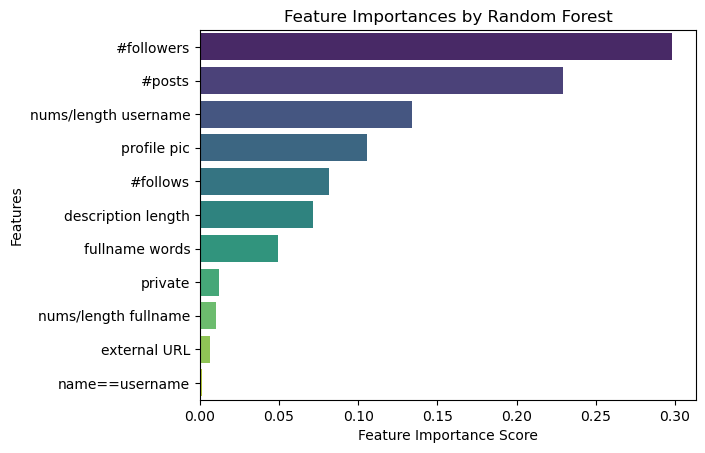

In [59]:

sns.barplot(y=X.columns[indices], x=importance[indices], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances by Random Forest")
plt.show()

In [60]:
y_pred=model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00        87

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

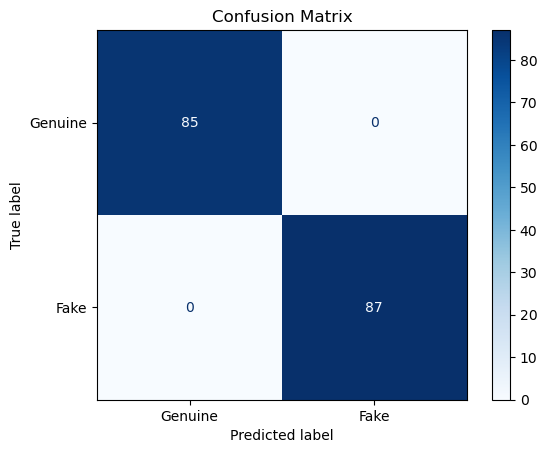

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Genuine', 'Fake'], 
                                        cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [67]:
feature_names = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username',
                 'description length', 'external URL', 'private', '#posts', '#followers', '#follows']

X_test_df = pd.DataFrame([[1,0.33,1,0.33,1,30,0,1,35,488,604]],
                         columns=feature_names)

y_predict = model.predict(X_test_df)


In [66]:
y_predict

array([0.])